In [8]:
import pandas as pd 

flight_data = pd.read_csv(r"C:\DA08\flight_data.csv")

In [9]:
#Đếm số chuyến bay trễ
counts = flight_data["origin"].value_counts()
print(counts)
counts_df = counts.to_frame(name="count")
print(counts_df)

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64
      count
EWR  120835
JFK  111279
LGA  104662


In [10]:
#Đếm số chuyến bay không trễ 
not_delayed_counts = flight_data[flight_data["dep_delay"] == 0].groupby("origin")["dep_delay"].count()

print(not_delayed_counts)

origin
EWR    5585
JFK    6239
LGA    4690
Name: dep_delay, dtype: int64


In [11]:
not_delayed_counts_df = not_delayed_counts.to_frame(name="not_delayed_count")
print(not_delayed_counts_df)

        not_delayed_count
origin                   
EWR                  5585
JFK                  6239
LGA                  4690


In [14]:
# Đếm số lượng chuyến bay trễ và không trễ cho mỗi sân bay
delay_counts = flight_data.groupby("origin")["dep_delay"].agg(["count", "sum"])
not_delayed_counts = flight_data[flight_data["dep_delay"] == 0].groupby("origin")["dep_delay"].count()

# Tạo bảng hiển thị số lượng chuyến bay trễ và không trễ
delay_summary = pd.concat([delay_counts, not_delayed_counts.rename("not_delayed_count")], axis=1)
delay_summary["delayed_count"] = delay_summary["count"] - delay_summary["not_delayed_count"]
print(delay_summary)

         count        sum  not_delayed_count  delayed_count
origin                                                     
EWR     117596  1776635.0               5585         112011
JFK     109416  1325264.0               6239         103177
LGA     101509  1050301.0               4690          96819


In [18]:
import matplotlib.pyplot as plt

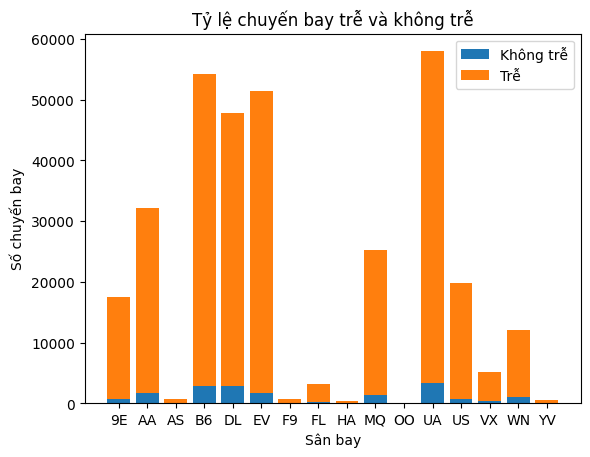

In [27]:
# Vẽ biểu đồ cột thể hiện tỷ lệ chuyến bay trễ và không trễ của mỗi sân bay
fig, ax = plt.subplots()
ax.bar(delay_summary.index, delay_summary["not_delayed_count"], label="Không trễ")
ax.bar(delay_summary.index, delay_summary["delayed_count"], bottom=delay_summary["not_delayed_count"], label="Trễ")
ax.legend()
ax.set_xlabel("Sân bay")
ax.set_ylabel("Số chuyến bay")
ax.set_title("Tỷ lệ chuyến bay trễ và không trễ")
plt.show()

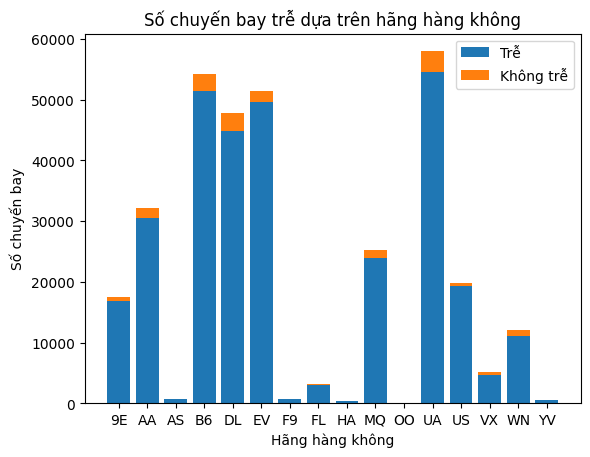

In [28]:

# Đếm số lượng chuyến bay trễ và không trễ cho mỗi hãng hàng không
delay_counts = flight_data.groupby("carrier")["dep_delay"].agg(["count", "sum"])
not_delayed_counts = flight_data[flight_data["dep_delay"] == 0].groupby("carrier")["dep_delay"].count()

# Tạo bảng hiển thị số lượng chuyến bay trễ và không trễ
delay_summary = pd.concat([delay_counts, not_delayed_counts.rename("not_delayed_count")], axis=1)
delay_summary["delayed_count"] = delay_summary["count"] - delay_summary["not_delayed_count"]

# In bảng hiển thị số lượng chuyến bay trễ và không trễ
#print(delay_summary)

# Vẽ biểu đồ
plt.bar(delay_summary.index, delay_summary["delayed_count"], label="Trễ")
plt.bar(delay_summary.index, delay_summary["not_delayed_count"], bottom=delay_summary["delayed_count"], label="Không trễ")
plt.legend()
plt.xlabel("Hãng hàng không")
plt.ylabel("Số chuyến bay")
plt.title("Số chuyến bay trễ dựa trên hãng hàng không")
plt.show()


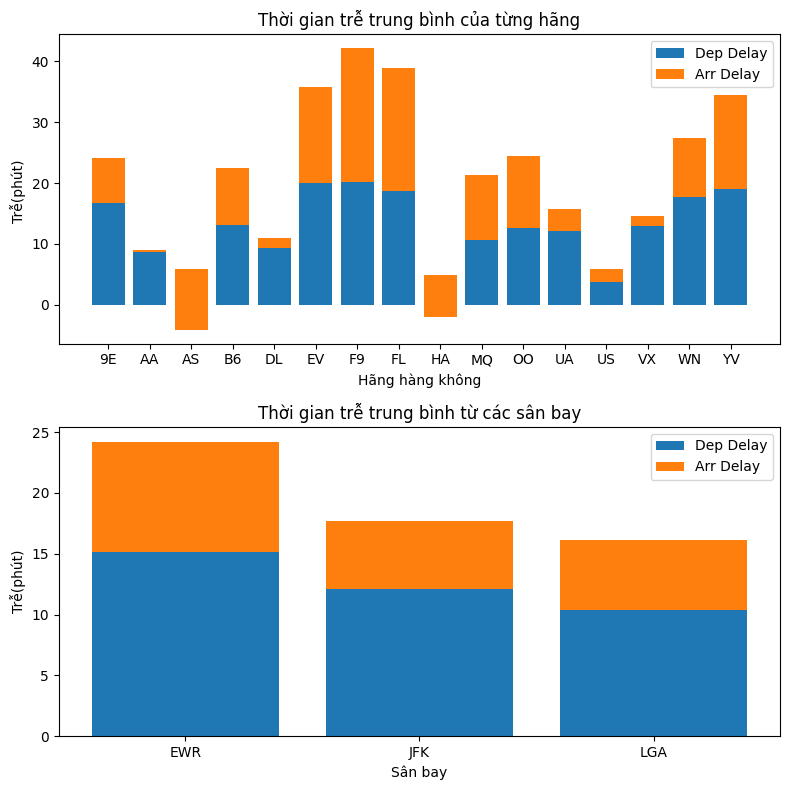

In [26]:
# Tính thời gian trễ trung bình từ các hãng hàng không và các sân bay
delay_by_carrier = flight_data.groupby("carrier")[["dep_delay", "arr_delay"]].mean()
delay_by_origin = flight_data.groupby("origin")[["dep_delay", "arr_delay"]].mean()

#In bảng hiển thị thời gian trễ trung bình từ các hãng hàng không và các sân bay
#print("Delay Summary by Carrier:")
#print(delay_by_carrier)
#print("\nDelay Summary by Origin:")
#print(delay_by_origin)

# Vẽ biểu đồ
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Biểu đồ thể hiện thời gian trễ trung bình từ các hãng hàng không
ax[0].bar(delay_by_carrier.index, delay_by_carrier["dep_delay"], label="Dep Delay")
ax[0].bar(delay_by_carrier.index, delay_by_carrier["arr_delay"], bottom=delay_by_carrier["dep_delay"], label="Arr Delay")
ax[0].legend()
ax[0].set_xlabel("Hãng hàng không")
ax[0].set_ylabel("Trễ(phút) ")
ax[0].set_title("Thời gian trễ trung bình của từng hãng")

# Biểu đồ thể hiện thời gian trễ trung bình từ các sân bay
ax[1].bar(delay_by_origin.index, delay_by_origin["dep_delay"], label="Dep Delay")
ax[1].bar(delay_by_origin.index, delay_by_origin["arr_delay"], bottom=delay_by_origin["dep_delay"], label="Arr Delay")
ax[1].legend()
ax[1].set_xlabel("Sân bay")
ax[1].set_ylabel("Trễ(phút)")
ax[1].set_title("Thời gian trễ trung bình từ các sân bay")

plt.tight_layout()
plt.show()


In [30]:
# Tính tổng, trung bình, median và mean của quãng đường bay của từng hãng
distance_stats = flight_data.groupby("carrier")["distance"].agg(["sum", "mean", "median", "std"])
distance_stats.columns = ["Total Distance", "Mean Distance", "Median Distance", "Standard Deviation"]

# In bảng hiển thị tổng, trung bình, median và mean của quãng đường bay của từng hãng
print("Distance Summary by Carrier:")
print(distance_stats)


Distance Summary by Carrier:
         Total Distance  Mean Distance  Median Distance  Standard Deviation
carrier                                                                    
9E              9788152     530.235753            509.0          321.798707
AA             43864584    1340.235999           1096.0          637.736153
AS              1715028    2402.000000           2402.0            0.000000
B6             58384137    1068.621525           1023.0          703.705660
DL             59507317    1236.901206           1020.0          660.172414
EV             30498951     562.991730            533.0          287.488159
F9              1109700    1620.000000           1620.0            0.000000
FL              2167344     664.829448            762.0          160.888036
HA              1704186    4983.000000           4983.0            0.000000
MQ             15033955     569.532712            502.0          226.228707
OO                16026     500.812500            419.0    